## Step : 1 Introduction

- In this project, we will use a standard imbalanced dataset referred to as the “Adult Income” or simply the “adult” dataset.

- The dataset is credited to Ronny Kohavi and Barry Becker and was drawn from the 1994 United States Census Bureau data and involves using personal details such as education level to predict whether an individual will earn more or less than  50,000 dollars per year.  


> The Adult dataset is from the Census Bureau and the task is to predict whether a given adult makes more than 50,000 dollars a year based attributes such as education, hours of work per week, etc.. 

           — Scaling Up The Accuracy Of Naive-bayes Classifiers: A Decision-tree Hybrid, 1996.

- The dataset provides 14 input variables that are a mixture of categorical, ordinal, and numerical data types. The complete list of variables is as follows:

 - Age.
 - Workclass.
 - Final Weight.
 - Education.
 - Education Number of Years.
 - Marital-status.
 - Occupation.
 - Relationship.
 - Race.
 - Sex.
 - Capital-gain.
 - Capital-loss.
 - Hours-per-week.
 - Native-country.  

- The dataset contains missing values that are marked with a question mark character (?).

- There are a total of 48,842 rows of data, and 3,620 with missing values, leaving 45,222 complete rows.

- There are two class values ‘>50K‘ and ‘<=50K‘, meaning it is a binary classification task. The classes are imbalanced, with a skew toward the ‘<=50K‘ class label.

 - ‘>50K’: majority class, approximately 25%.
 - ‘<=50K’: minority class, approximately 75%.  
  

__Next, let’s take a closer look at the data.__



## Step - 2: Import the data and perform the basic panda operations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read the data using Pandas

In [102]:
df=pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [ ]:
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
37944,61,Private,95500,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
47185,22,Private,191444,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,40,United-States,<=50K
12693,47,Self-emp-not-inc,184682,HS-grad,9,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
1002,18,?,243203,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,Puerto-Rico,<=50K
15149,41,Private,24273,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
43765,50,Private,306790,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
29909,30,Private,154120,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,65,United-States,<=50K
11115,36,Private,275338,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,>50K
34010,38,Private,137707,Assoc-voc,11,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States,>50K
19250,27,Private,85625,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.size

732630

In [ ]:
df.shape

(48842, 15)

#### Checking any null values present in the data

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

##### we can see there are no missing values present in the data

## Step - 3: Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


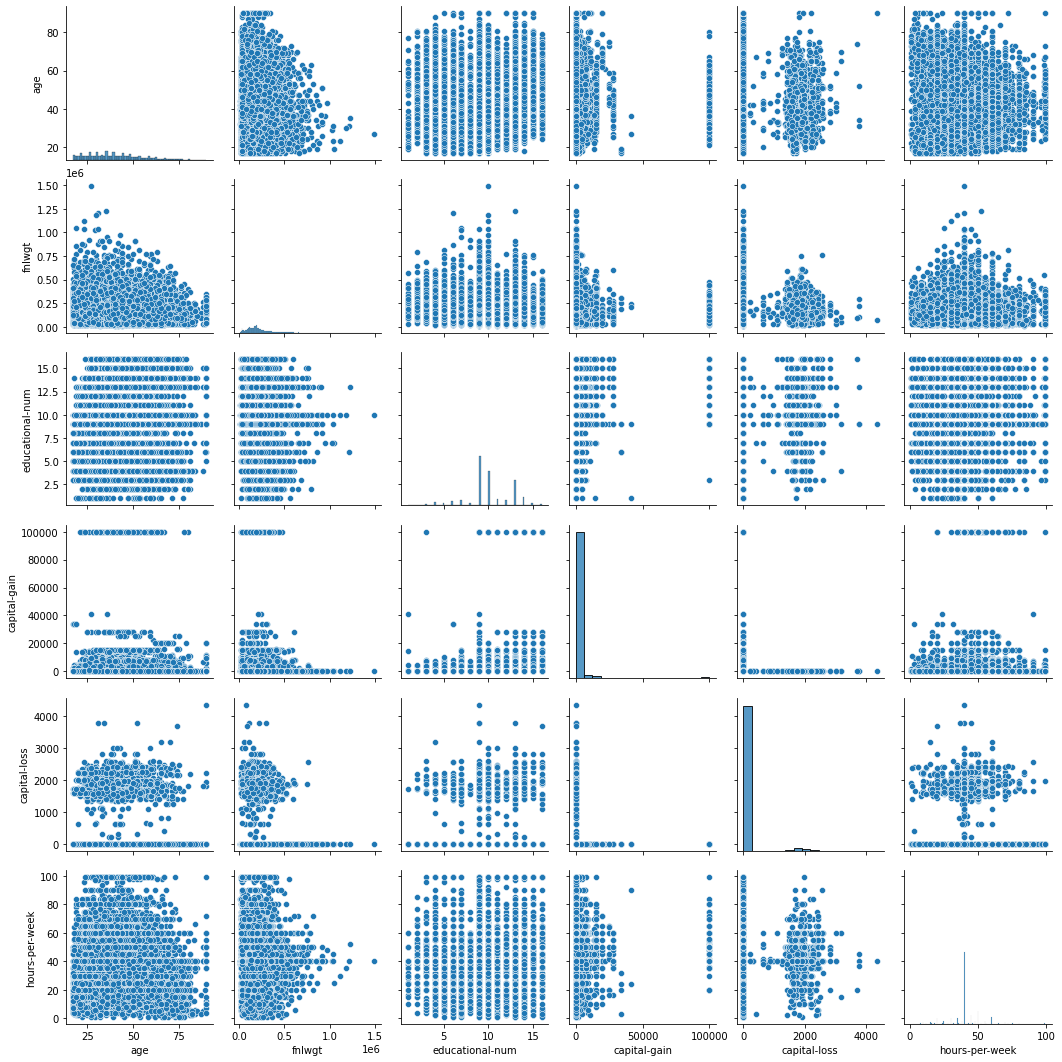

In [ ]:
sns.pairplot(df)

## Age Distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


38.64358543876172

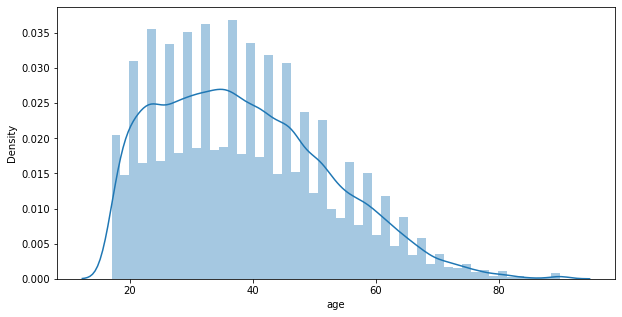

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['age'])
df['age'].mean()

## we can see that the distribution of ages and most of the people from the age groups of 20-50

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

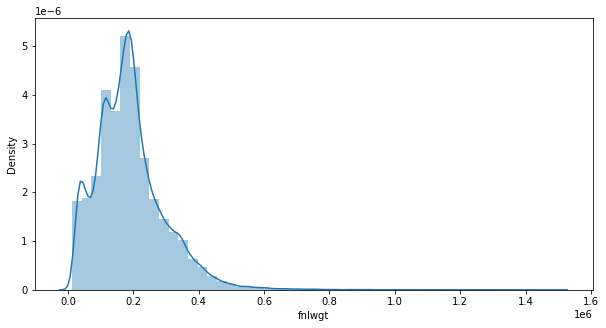

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['fnlwgt'])

###  we can see the distribution of final weight and it appears like a log normal distribution can be converted into normal distribution using box cox transformation

## Educational Num Distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educational-num', ylabel='Density'>

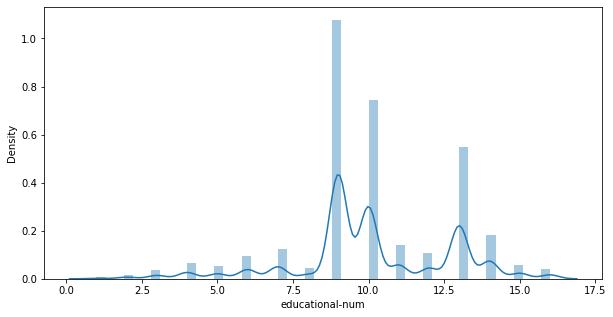

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['educational-num'])

## we can see the most of the people belongs to educational num of 9 and 10

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

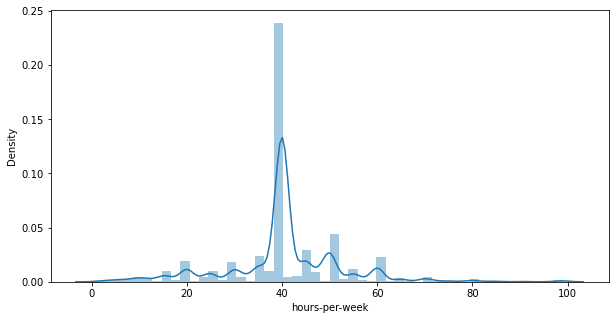

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(df['hours-per-week'])

##  On an average the working hours are 40 hours per week

### Let's visualize the data by plotting some graphs on univariate analysis  
  
Box plot is very useful for detecting the outliers in three different percentiles i.e(25,50,75)  
percentile basically shows where a percentile lies in a sorted list

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a07a2f64f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a07a2f6bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a07a2f6190>],
 'medians': [<matplotlib.lines.Line2D at 0x2a07a3042b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a07a304610>],
 'means': []}

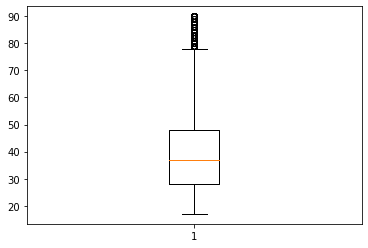

In [ ]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a07a33f2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a07a33f9a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a07a34ef40>],
 'medians': [<matplotlib.lines.Line2D at 0x2a07a3360a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a07a336400>],
 'means': []}

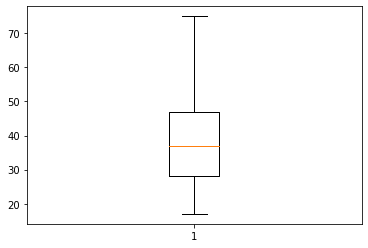

In [ ]:
def drop_outliers(df,fieldname):
    iqr=1.5*(np.percentile(df[fieldname],75)-np.percentile(df[fieldname],25))
    df.drop(df[df[fieldname]>(iqr+np.percentile(df[fieldname],75))].index,inplace=True)
    df.drop(df[df[fieldname]<(np.percentile(df[fieldname],25)-iqr)].index,inplace=True)
drop_outliers(df,'age')
plt.boxplot(df['age'])

##### so from box plot we can see the outliers and we can remove it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48469 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48469 non-null  int64 
 1   workclass        48469 non-null  object
 2   fnlwgt           48469 non-null  int64 
 3   education        48469 non-null  object
 4   educational-num  48469 non-null  int64 
 5   marital-status   48469 non-null  object
 6   occupation       48469 non-null  object
 7   relationship     48469 non-null  object
 8   race             48469 non-null  object
 9   gender           48469 non-null  object
 10  capital-gain     48469 non-null  int64 
 11  capital-loss     48469 non-null  int64 
 12  hours-per-week   48469 non-null  int64 
 13  native-country   48469 non-null  object
 14  income           48469 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.9+ MB


{'whiskers': [<matplotlib.lines.Line2D at 0x2a07c1e7130>,
 'caps': [<matplotlib.lines.Line2D at 0x2a07c1e77f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a07c1d9d90>],
 'medians': [<matplotlib.lines.Line2D at 0x2a07c1e7eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a07c1f2250>],
 'means': []}

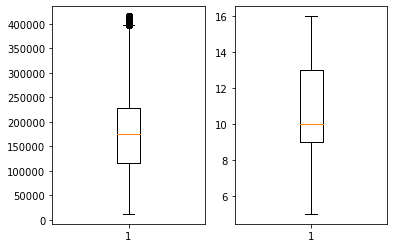

In [ ]:

plt.subplot(1,2,1)
plt.boxplot(df['fnlwgt'])
plt.subplot(1,2,2)
plt.boxplot(df['educational-num'])


In [ ]:
drop_outliers(df,'educational-num')
drop_outliers(df,'fnlwgt')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a0798bbcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a0798f96a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0798bb3a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a0798f9a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a0798f9160>],
 'means': []}

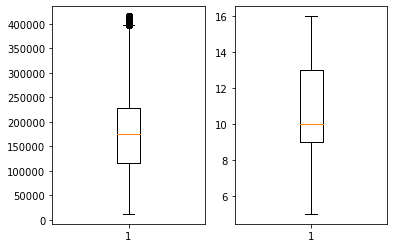

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(df['fnlwgt'])
plt.subplot(1,2,2)
plt.boxplot(df['educational-num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2a07c296f40>,
 'caps': [<matplotlib.lines.Line2D at 0x2a07c2a6640>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a07c296be0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a07c2a6d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a07c2b30a0>],
 'means': []}

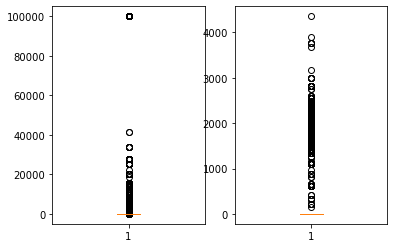

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(df['capital-gain'])

plt.subplot(1,2,2)
plt.boxplot(df['capital-loss'])

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45339.000000,45339.000000,45339.000000,45339.000000,45339.000000,45339.000000
mean,38.130925,179049.778535,10.343788,1102.777013,89.345971,40.601756
std,13.110060,87174.703203,2.234758,7551.981381,406.149734,12.291708
min,17.000000,12285.000000,5.000000,0.000000,0.000000,1.000000
25%,28.000000,115819.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,175507.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,228132.000000,13.000000,0.000000,0.000000,45.000000
max,75.000000,415287.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
drop_outliers(df,'capital-gain')
drop_outliers(df,'capital-loss')

{'whiskers': [<matplotlib.lines.Line2D at 0x2a07b940100>,
 'caps': [<matplotlib.lines.Line2D at 0x2a07b9406d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a0799574f0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a07b8e8fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a07b8e82b0>],
 'means': []}

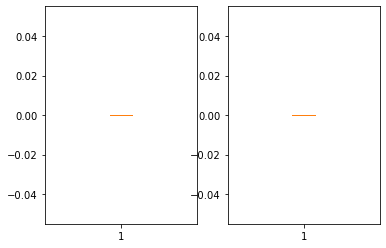

In [ ]:
plt.subplot(1,2,1)
plt.boxplot(df['capital-gain'])

plt.subplot(1,2,2)
plt.boxplot(df['capital-loss'])

Since the data columns capital gain and capital loss contains mostly zero values we don't have much information from these columns 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### let's know about categorical values

In [ ]:
df['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'])
df['income']=le.fit_transform(df['income'])
df['education']=le.fit_transform(df['education'])
df['occupation']=le.fit_transform(df['occupation'])
df['gender']=le.fit_transform(df['gender'])

In [ ]:
df['workclass'].sample(10)

46379    4
21236    2
42451    4
33264    4
18390    4
40756    0
36829    1
18708    0
30152    6
40826    4
Name: workclass, dtype: int32

## Workclass ditribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='workclass', ylabel='Density'>

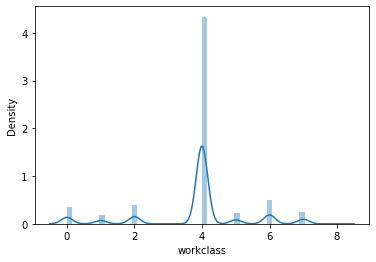

In [ ]:
sns.distplot(df['workclass'])

### We can see that most of the people are from private sector

## Gender Distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='gender', ylabel='Density'>

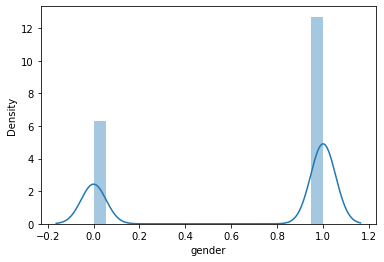

In [ ]:
sns.distplot(df['gender'])

## Education Distribution

<AxesSubplot:xlabel='education', ylabel='Density'>

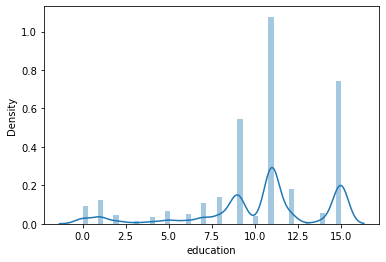

In [ ]:
sns.distplot(df['education'])

## Income Distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

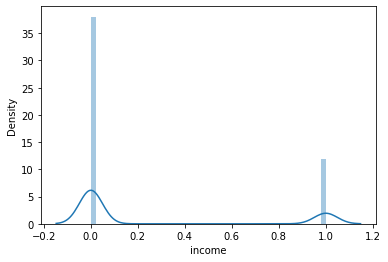

In [ ]:
sns.distplot(df['income'])

### The Target variable has only two outcome either o or 1 so we can say that the problem belongs to binary classification

## Occupation Distribution

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='occupation', ylabel='Density'>

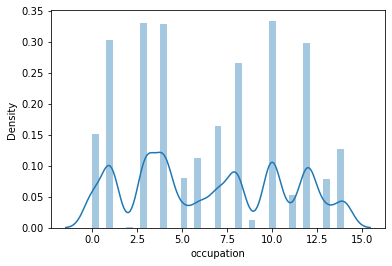

In [ ]:
sns.distplot(df['occupation'])

## Educational Distribution

NameError: ignored

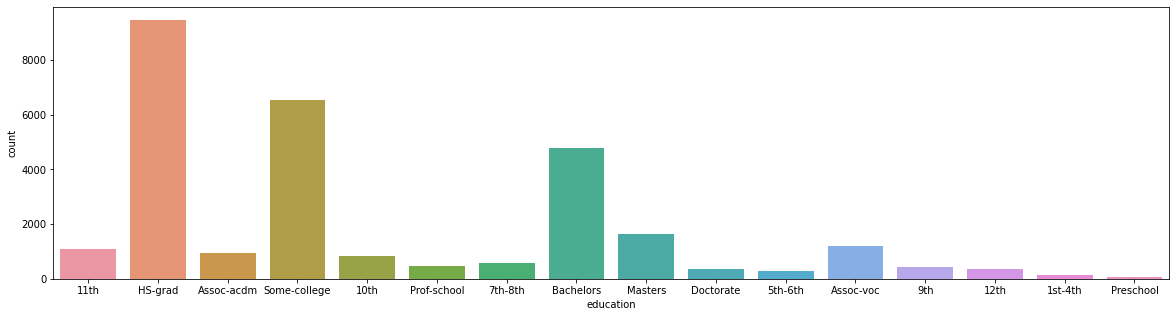

In [ ]:
plt.figure(figsize=(20,5))
a= float(len(['income']))

a= sns.countplot(x='education',data=df)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()
   

# Step 4 : Bivariate analysis

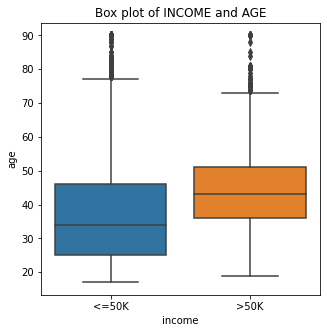

In [ ]:
fig = plt.figure(figsize=(5,5))
sns.boxplot(x='income',y='age',data=df).set_title('Box plot of INCOME and AGE')
plt.show()

### Income group(<=50k) has lower median "age"(34 year) than the Income group(>50k) which has median "age"(42 year)

## Workclass relationship with income

Text(0.5, 1.0, 'workclass vs count')

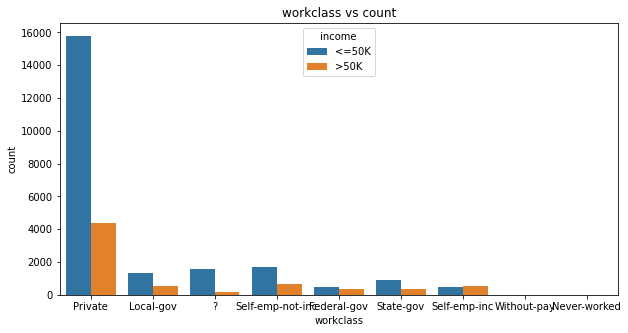

In [ ]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='workclass',hue ='income',data=df).set_title("workclass vs count")


### The data seems to mainly consist private employees.In All the workclasses number of people earning less then 50k are more then those earning 50k

## Race Relationship With Income

<Figure size 1440x360 with 0 Axes>

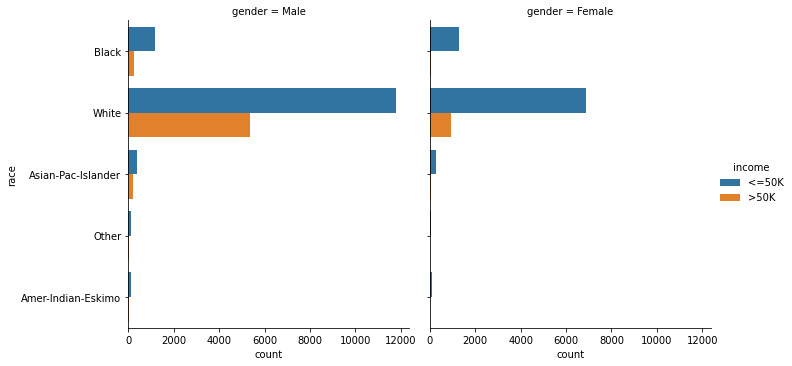

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df)

### It is clear people with Gender male and race as white has the most people with income more then 50k.



## Relationship Relation with income

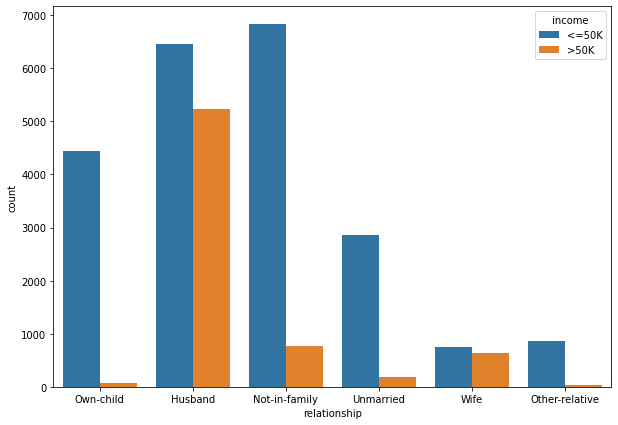

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income",data=df)

### Mostly a person with relation as husband in a family has most count of people with more then 50k income

## plot of Workclass and income

posx and posy should be finite values
posx and posy should be finite values


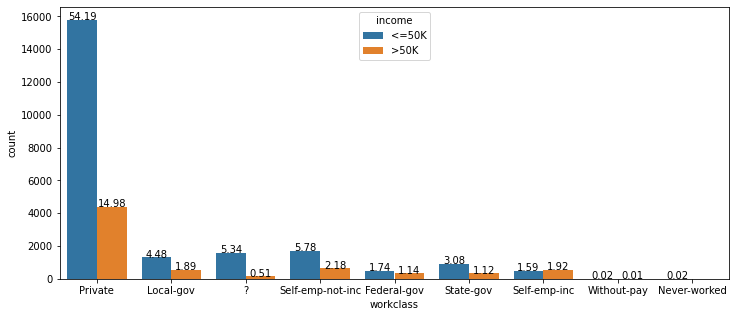

In [ ]:
plt.figure(figsize=(12,5))
total = float(len(df["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

### We can see that self emp income people will have higher income range than other sector people

## Violin Plot

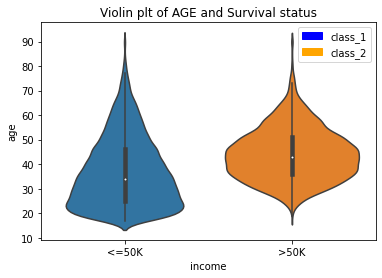

In [ ]:
import matplotlib.patches as mpatches
sns.violinplot(x="income", y="age", data=df, size=8)
plt.title('Violin plt of AGE and Survival status')
blue_patch = mpatches.Patch(color='blue', label='class_1')
orange_patch = mpatches.Patch(color='orange', label='class_2')
plt.legend(handles=[blue_patch,orange_patch],loc=1)
plt.show()


by observation of violin plot. This plot gives the combined information of PDF and box plot. The curve denotes the PDF and middle area denotes box plot.

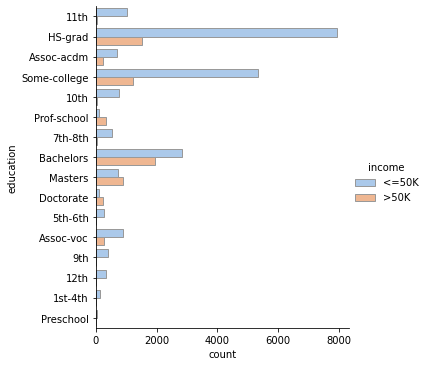

In [ ]:
sns.catplot(y="education", hue="income", kind="count",palette="pastel", edgecolor=".6",data=df);


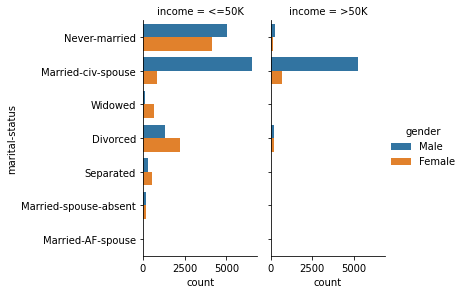

In [ ]:
ct = sns.catplot(y='marital-status',hue='gender',col='income',data=df,kind='count',height=4,aspect=.7)


### The above plot shows the marital status of the people according to income with respect of gender

<Figure size 1440x504 with 0 Axes>

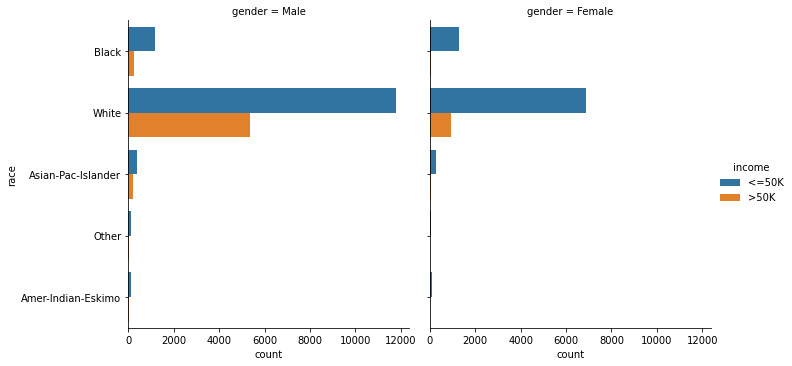

In [ ]:
plt.figure(figsize=(20,7))
sns.catplot(y="race", hue="income", kind="count",col="gender", data=df)

### The above plot shows the race distribution according to the income with respect ot gender

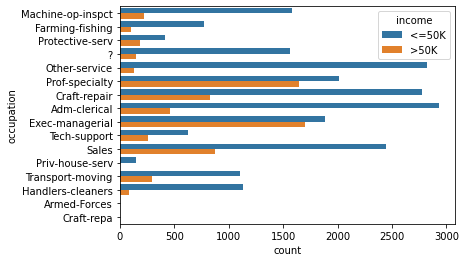

In [ ]:
sns.countplot(y="occupation", hue="income",data=df)


### The above plot shows the income status according to the occupation

In [ ]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076462,0.022686,0.069840,0.058429,0.070356
fnlwgt,-0.076462,1.000000,-0.039183,-0.007313,-0.001237,-0.010302
educational-num,0.022686,-0.039183,1.000000,0.125068,0.081614,0.137236
capital-gain,0.069840,-0.007313,0.125068,1.000000,-0.031451,0.083168
capital-loss,0.058429,-0.001237,0.081614,-0.031451,1.000000,0.054830
hours-per-week,0.070356,-0.010302,0.137236,0.083168,0.054830,1.000000


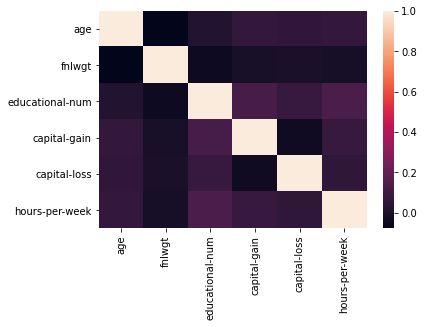

In [ ]:
sns.heatmap(df.corr())

# Step 5 : Outliers and Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29121 entries, 0 to 29120
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              29121 non-null  int64  
 1   workclass        29121 non-null  object 
 2   fnlwgt           29121 non-null  int64  
 3   education        29121 non-null  object 
 4   educational-num  29121 non-null  int64  
 5   marital-status   29121 non-null  object 
 6   occupation       29121 non-null  object 
 7   relationship     29120 non-null  object 
 8   race             29120 non-null  object 
 9   gender           29120 non-null  object 
 10  capital-gain     29120 non-null  float64
 11  capital-loss     29120 non-null  float64
 12  hours-per-week   29120 non-null  float64
 13  native-country   29120 non-null  object 
 14  income           29120 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       1
race               1
gender             1
capital-gain       1
capital-loss       1
hours-per-week     1
native-country     1
income             1
dtype: int64

## Z-SCORE METHOD
Using Z score method,we can find out how many standard deviations value away from the mean.
![](https://i.pinimg.com/originals/cd/14/73/cd1473c4c82980c6596ea9f535a7f41c.jpg)  

Figure in the left shows area under normal curve and how much area that standard deviation covers.
* 68% of the data points lie between + or - 1 standard deviation.
* 95% of the data points lie between + or - 2 standard deviation
* 99.7% of the data points lie between + or - 3 standard deviation


In [ ]:
out=[]
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
print(Zscore_outlier(df['fnlwgt']))
print(Zscore_outlier(df['age']))

Outliers: [537222, 513100, 512864, 599057, 542610, 652784, 573446, 662460, 629900, 509364, 632733, 560313, 651702, 644278, 535852, 522241, 581128, 608881, 914061, 624006, 510072, 593246, 714597, 816750, 552529, 575172, 622192, 566066, 614113, 548568, 565769, 789600, 864960, 723746, 692831, 535869, 638116, 698039, 677398, 547931, 666014, 765214, 761800, 1047822, 544319, 617917, 522881, 750972, 520231, 589155, 538193, 588739, 588484, 528618, 806552, 858091, 663291, 581025, 656488, 557349, 655066, 737315, 541755, 594521, 589838, 605504, 558752, 772919, 884434, 604045, 697806, 632271, 587310, 538243, 1490400, 768659, 764638, 517995, 718736, 547108, 882849, 746660, 786418, 565313, 653215, 576645, 510643, 538099, 539019, 531055, 594187, 685955, 548361, 606111, 592029, 513977, 647591, 566066, 553588, 624572, 535740, 607118, 580591, 557853, 635913, 557805, 626493, 914061, 557349, 953588, 558344, 590204, 679853, 516701, 535762, 814850, 874728, 506830, 594194, 538583, 602513, 589809, 507492, 546

## ROBUST Z-SCORE
It is also called as Median absolute deviation method. It is similar to Z-score method with some changes in parameters. Since mean and standard deviations are heavily influenced by outliers, alter to this parameters we use median and absolute deviation from median.


In [ ]:
from scipy import stats
out=[]
def ZRscore_outlier(df):
    med = np.median(df)
    ma = stats.median_absolute_deviation(df)
    for i in df: 
        z = (0.6745*(i-med))/ (np.median(ma))
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
print(ZRscore_outlier(df['capital-loss']))
print(ZRscore_outlier(df['hours-per-week']))
print(ZRscore_outlier(df['capital-gain']))
print(ZRscore_outlier(df['age']))
print(ZRscore_outlier(df['fnlwgt']))

Outliers: []
None
Outliers: []
None
Outliers: []
None
Outliers: []
None
Outliers: [599057, 652784, 662460, 629900, 632733, 651702, 644278, 581128, 608881, 914061, 624006, 593246, 714597, 816750, 622192, 614113, 789600, 864960, 723746, 692831, 638116, 698039, 677398, 666014, 765214, 761800, 1047822, 617917, 750972, 589155, 588739, 588484, 806552, 858091, 663291, 581025, 656488, 655066, 737315, 594521, 589838, 605504, 772919, 884434, 604045, 697806, 632271, 587310, 1490400, 768659, 764638, 718736, 882849, 746660, 786418, 653215, 594187, 685955, 606111, 592029, 647591, 624572, 607118, 580591, 635913, 626493, 914061, 953588, 590204, 679853, 814850, 874728, 594194, 602513, 589809, 1117718, 849067, 590941, 608441, 720428, 590522, 744929, 598995, 913447, 584259, 694105, 606347, 1024535, 811615, 1210504, 742903, 618130, 771836, 618808, 607658, 633742, 635913, 860348, 1033222, 680390, 767403, 795830, 910398, 672412, 675421, 758700, 656036, 716416, 637222, 664821, 598606, 580248, 617021, 596776,

## IQR METHOD  

In this method by using Inter Quartile Range(IQR), we detect outliers. IQR tells us the variation in the data set.Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR treated as outliers  
![](https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png)


* Q1 represents the 1st quartile/25th percentile of the data.
* Q2 represents the 2nd quartile/median/50th percentile of the data.
* Q3 represents the 3rd quartile/75th percentile of the data.
* (Q1–1.5*IQR) represent the smallest value in the data set and (Q3+1.5*IQR) represnt the largest value in the data set.

In [ ]:
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("Outliers:",out)
iqr_outliers(df['educational-num'])

Outliers: [4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 4, 2, 4, 4, 3, 3, 2, 4, 3, 3, 4, 3, 3, 4, 4, 4, 1, 1, 4, 3, 2, 4, 4, 2, 3, 4, 4, 1, 4, 1, 4, 4, 4, 3, 4, 4, 3, 4, 3, 4, 2, 4, 2, 4, 4, 4, 3, 4, 2, 4, 4, 3, 3, 1, 1, 4, 3, 4, 2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 2, 3, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 1, 4, 4, 4, 3, 4, 2, 4, 2, 4, 4, 4, 4, 3, 3, 4, 4, 1, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 3, 3, 4, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 3, 4, 1, 2, 3, 4, 3, 2, 4, 1, 4, 2, 3, 3, 4, 4, 4, 1, 2, 2, 4, 3, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 2, 4, 4, 4, 3, 4, 3, 2, 4, 4, 3, 4, 2, 2, 4, 1, 2, 3, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 4, 4, 4, 3, 3, 3, 2, 3, 4, 3, 4, 4, 4, 3, 1, 2, 2, 2, 2, 3, 1, 2, 3, 4, 4, 4, 1, 1, 2, 4, 4, 4, 4, 2, 4, 3, 4, 3, 1, 3, 3, 1, 3, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 3, 4, 4, 3, 2, 4, 4, 2, 4, 4, 3, 4, 3, 4, 4, 4, 4, 4, 2, 3,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29121 entries, 0 to 29120
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              29121 non-null  int64  
 1   workclass        29121 non-null  object 
 2   fnlwgt           29121 non-null  int64  
 3   education        29121 non-null  object 
 4   educational-num  29121 non-null  int64  
 5   marital-status   29121 non-null  object 
 6   occupation       29121 non-null  object 
 7   relationship     29120 non-null  object 
 8   race             29120 non-null  object 
 9   gender           29120 non-null  object 
 10  capital-gain     29120 non-null  float64
 11  capital-loss     29120 non-null  float64
 12  hours-per-week   29120 non-null  float64
 13  native-country   29120 non-null  object 
 14  income           29120 non-null  object 
dtypes: float64(3), int64(3), object(9)
memory usage: 3.3+ MB


## WINSORIZATION METHOD(PERCENTILE CAPPING)  

This method is similar to IQR method. If a value exceeds the value of the 99th percentile and below the 1st percentile of given values are treated as outliers.


In [ ]:
out=[]
def Winsorization_outliers(df):
    q1 = np.percentile(df , 1)
    q3 = np.percentile(df , 99)
    for i in df:
        if i > q3 or i < q1:
            out.append(i)
    print("Outliers:",out)
print(Winsorization_outliers(df['age']))

print(Winsorization_outliers(df['fnlwgt']))

print(Winsorization_outliers(df['educational-num']))

print(Winsorization_outliers(df['hours-per-week']))

Outliers: [79, 77, 80, 75, 90, 79, 80, 77, 81, 78, 82, 83, 75, 75, 81, 85, 77, 76, 78, 77, 75, 76, 80, 77, 76, 90, 76, 81, 77, 77, 77, 75, 75, 76, 76, 76, 77, 84, 81, 89, 77, 77, 77, 75, 77, 76, 78, 76, 77, 75, 81, 77, 83, 81, 76, 82, 80, 90, 81, 77, 83, 80, 75, 90, 90, 84, 78, 80, 76, 77, 78, 76, 75, 75, 80, 75, 80, 76, 75, 81, 90, 76, 76, 77, 78, 85, 90, 81, 81, 80, 80, 77, 78, 79, 75, 81, 75, 80, 88, 87, 77, 76, 90, 78, 76, 77, 79, 83, 79, 75, 80, 90, 79, 75, 79, 81, 78, 75, 81, 76, 75, 90, 76, 76, 82, 77, 76, 77, 75, 78, 75, 90, 87, 75, 81, 88, 75, 80, 81, 80, 81, 78, 76, 77, 90, 88, 75, 77, 89, 75, 75, 75, 84, 80, 80, 76, 83, 79, 81, 79, 76, 90, 75, 77, 76, 80, 81, 78, 76, 90, 88, 75, 76, 75, 90, 77, 75, 75, 90, 75, 76, 77, 78, 80, 90, 81, 75, 75, 82, 76, 79, 81, 76, 75, 80, 75, 83, 77, 90, 90, 76, 75, 77, 79, 76, 81, 75, 76, 90, 76, 76, 90, 80, 77, 90, 90, 78, 76, 76, 78, 79, 78, 79, 84, 90, 77, 75, 80, 75, 77, 90, 75, 81, 83, 84, 81, 79, 76, 85, 82, 78, 75, 79, 77, 80, 90, 76, 9

## WHAT NEXT??
After detecting the outlier we should remove\treat the outlier because it is a silent killer!! yes.
* Outliers badly affect mean and standard deviation of the dataset. These may statistically give erroneous results.
* It increases the error variance and reduces the power of statistical tests.
* If the outliers are non-randomly distributed, they can decrease normality.
* Most machine learning algorithms do not work well in the presence of outlier. So it is desirable to detect and remove outliers.
* They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
With all these reasons we must be careful about outlier and treat them before build a statistical/machine learning model. There are some techniques used to deal with outliers.
1. Deleting observations.
2. Transforming values.
3. Imputation.
4. Separately treating

## IMPUTATION  

Like imputation of missing values, we can also impute outliers. We can use mean, median, zero value in this methods. Since we imputing there is no loss of data. Here median is appropriate because it is not affected by outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


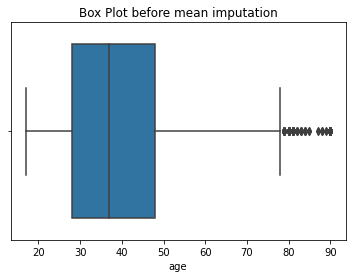

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


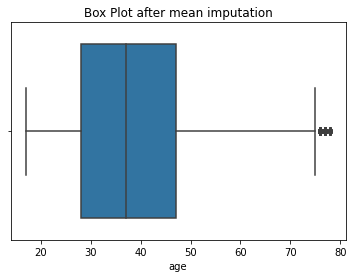

In [ ]:
sns.boxplot(df['age'])
plt.title("Box Plot before mean imputation")
plt.show()
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
Lower_tail = q1 - 1.5 * iqr
Upper_tail = q3 + 1.5 * iqr
m = np.mean(df['age'])
for i in df['age']:
    if i > Upper_tail or i < Lower_tail:
            df['age'] = df['age'].replace(i, m)
sns.boxplot(df['age'])
plt.title("Box Plot after mean imputation")
plt.show()

## DELETING OBSERVATIONS:  

We delete outlier values if it is due to data entry error, data processing error or outlier observations are very small in numbers. We can also use trimming at both ends to remove outliers. But deleting the observation is not a good idea when we have small dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


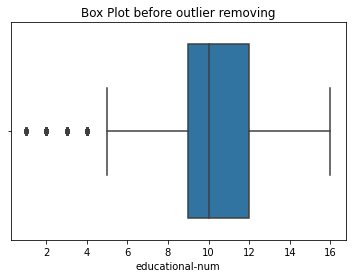

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


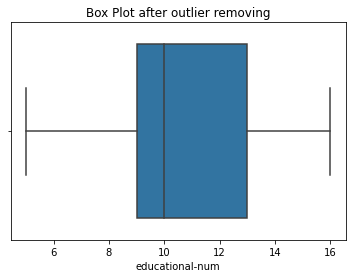

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


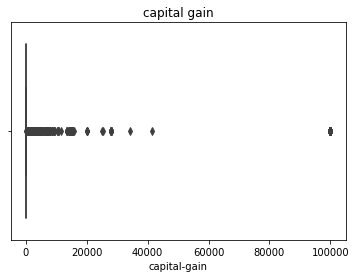

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


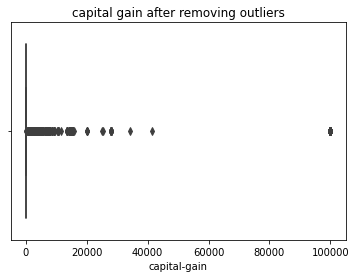

In [3]:
sns.boxplot(df['educational-num'])
plt.title("Box Plot before outlier removing")
plt.show()
def drop_outliers(df, field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df,'educational-num')
sns.boxplot(df['educational-num'])
plt.title("Box Plot after outlier removing")
plt.show()
sns.boxplot(df['capital-gain'])
plt.title('capital gain')
plt.show()
drop_outliers(df,'capital-gain')
sns.boxplot(df['capital-gain'])
plt.title('capital gain after removing outliers')
plt.show()


# Step - 6: Some Conclusions from EDA

- Adults with an educational background of Prof-school (7) and Doctorate (10) will have a better income and it is likely possible that their income is higher than 50K.  

- Our data suggest that people with occupation Prof-specialty (5) and Exec-managerial (7) will have a better chance of earning an income of more than 50K.  

- The gender bar chart provides us some useful insight into the data that Men (0) are more likely to have a higher income.  

- relationship chart shows us that wife (1) and husband (4) has a higher income. A married couple would most likely earn >50K.  

- As per the data, an Asian-Pac-Islander (1) or a white (3) have more chances of earning more than 50K.  

- Self-emp-in (0), Federal-gov(2) workclass groups have a higher chance of earning more than 50K.


# Step-7 Feature Transformation

In [4]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())


---- age ---
23    274
33    270
36    270
35    261
37    259
     ... 
85      2
89      1
82      1
84      1
79      1
Name: age, Length: 71, dtype: int64
---- workclass ---
Private             6389
Self-emp-not-inc     746
Local-gov            605
?                    548
State-gov            426
Self-emp-inc         353
Federal-gov          277
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64
---- fnlwgt ---
48520     7
125892    7
186934    6
53956     6
190290    6
         ..
129298    1
193945    1
92440     1
90393     1
118786    1
Name: fnlwgt, Length: 8003, dtype: int64
---- education ---
HS-grad         3145
Some-college    2141
Bachelors       1612
Masters          549
Assoc-voc        417
11th             362
Assoc-acdm       319
10th             274
9th              149
Prof-school      148
12th             124
Doctorate        108
Name: education, dtype: int64
---- educational-num ---
9     3145
10    2141
13    1612
14     549
11     4

Here we ran a for loop over all the columns using the .value_counts() function of Pandas which gets us the count of unique values. We can see that some of the data provided are unique like the ‘workclass’ attribute which has only 7 distinct values and some columns have a lot of distinct values like fnlgwt attribute which has around 2000+ values.
So, let’s drop the attributes that have noisy data.

In [103]:
df.drop(['educational-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss'], axis=1, inplace=True)


In [104]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K


In [105]:
df['country'] = df['native-country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)
df['education'] = df['education'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['marital-status'] = df['marital-status'].replace('?',np.nan)
df['gender'] = df['gender'].replace('?',np.nan)
df['race']=df['race'].replace('?',np.nan)

df['relationship'] = df['relationship'].replace('?',np.nan)


df.dropna(how='any',inplace=True)

In [106]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


In [107]:
df.drop(['country'],axis=1,inplace=True)

In [108]:
df.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,0


In [109]:
pd.get_dummies(df, columns=["workclass"]).head()


,education,marital-status,occupation,relationship,race,gender,native-country,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay
0,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0,0,0,1,0,0,0,0
1,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0,0,0,1,0,0,0,0
2,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1,0,1,0,0,0,0,0
3,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1,0,0,1,0,0,0,0
5,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,0,0,0,1,0,0,0,0


In [124]:
from sklearn.preprocessing import OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(df[["workclass"]])
pd.DataFrame(oe_results.toarray(), columns=oe_style.categories_).head()




,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [125]:
df.head()

,workclass,education,occupation,relationship,race,gender,native-country,income,maritalstatus
0,Private,1.0,6.0,3.0,Black,1.0,38.0,0,4.0
1,Private,11.0,4.0,0.0,White,1.0,38.0,0,2.0
2,Local-gov,7.0,10.0,0.0,White,1.0,38.0,1,2.0
3,Private,15.0,6.0,0.0,Black,1.0,38.0,1,2.0
5,Private,0.0,7.0,1.0,White,1.0,38.0,0,4.0


In [126]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
#df["maritalstatus"] = ord_enc.fit_transform(df[["marital-status"]])
df["occupation"] = ord_enc.fit_transform(df[["occupation"]])
#df["relationship"] = ord_enc.fit_transform(df[["relationship"]])
df["gender"] = ord_enc.fit_transform(df[["gender"]])
df["education"] = ord_enc.fit_transform(df[['education']])
df["native-country"] = ord_enc.fit_transform(df[["native-country"]])
df["workclass"] = ord_enc.fit_transform(df[["workclass"]])
df["race"] = ord_enc.fit_transform(df[["race"]])




In [127]:
df.head()

,workclass,education,occupation,relationship,race,gender,native-country,income,maritalstatus
0,2.0,1.0,6.0,3.0,2.0,1.0,38.0,0,4.0
1,2.0,11.0,4.0,0.0,4.0,1.0,38.0,0,2.0
2,1.0,7.0,10.0,0.0,4.0,1.0,38.0,1,2.0
3,2.0,15.0,6.0,0.0,2.0,1.0,38.0,1,2.0
5,2.0,0.0,7.0,1.0,4.0,1.0,38.0,0,4.0


In [117]:
df.drop(['marital-status'],axis=1,inplace=True)

In [61]:
df.head()

,workclass,education,occupation,relationship,race,gender,income,maritalstatus,relatinship
0,5,11,6.0,3.0,0,0,0,5.0,3.0
1,5,3,4.0,0.0,3,0,0,2.0,0.0
2,4,9,10.0,0.0,3,0,1,2.0,0.0
3,5,0,6.0,0.0,0,0,1,2.0,0.0
5,5,13,7.0,1.0,3,0,0,5.0,1.0


In [63]:
df.drop(['relatinship'],axis=1,inplace=True)

In [64]:
df.head()

,workclass,education,occupation,relationship,race,gender,income,maritalstatus
0,5,11,6.0,3.0,0,0,0,5.0
1,5,3,4.0,0.0,3,0,0,2.0
2,4,9,10.0,0.0,3,0,1,2.0
3,5,0,6.0,0.0,0,0,1,2.0
5,5,13,7.0,1.0,3,0,0,5.0


# Step-8: Building Machine Learning Models

## Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics


In [68]:
df_x = pd.DataFrame(np.c_[df['relationship'], df['education'], df['race'],df['occupation'],df['gender'],df['maritalstatus'],df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])

df_y = pd.DataFrame(df.income)

In [69]:
reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [70]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [71]:
reg.predict([[1,7,3,7,0,2,0]])


array([1])

In [72]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7590192644483362


## K Nearest Neighbors

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [76]:
y_pred = classifier.predict(x_test)

In [77]:
classifier.predict([[1,7,3,7,0,2,0]])


array([1])

In [78]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7950963222416813


## Support Vector Machine

In [79]:
from sklearn.svm import SVC

In [80]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
y_pred = svc.predict(x_test)

In [84]:
svc.predict([[1,7,3,7,0,2,0]])


array([0])

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7537653239929948


# Step-9: Table of Accuracy and model

| Machine Learnig Algorithm | Accuracy |
|:---|:---|
|Logistic Regression|0.7590192644483362|
| K Nearest Neighbors|0.7950963222416813|
|Support Vector Machine|0.7537653239929948|

# Step 10: Learning from references

In [128]:
df

,workclass,education,occupation,relationship,race,gender,native-country,income,maritalstatus
0,2.0,1.0,6.0,3.0,2.0,1.0,38.0,0,4.0
1,2.0,11.0,4.0,0.0,4.0,1.0,38.0,0,2.0
2,1.0,7.0,10.0,0.0,4.0,1.0,38.0,1,2.0
3,2.0,15.0,6.0,0.0,2.0,1.0,38.0,1,2.0
5,2.0,0.0,7.0,1.0,4.0,1.0,38.0,0,4.0
...,...,...,...,...,...,...,...,...,...
48837,2.0,7.0,12.0,5.0,4.0,0.0,38.0,0,2.0
48838,2.0,11.0,6.0,0.0,4.0,1.0,38.0,1,2.0
48839,2.0,11.0,0.0,4.0,4.0,0.0,38.0,0,6.0
48840,2.0,11.0,0.0,3.0,4.0,1.0,38.0,0,4.0


In [165]:
column_maxes=df.max()
df_max=column_maxes.max()
normalized_df=df/df_max
normalized_df

,workclass,education,occupation,relationship,race,gender,native-country,income,maritalstatus
0,0.050,0.025,0.150,0.075,0.05,0.025,0.95,0.000,0.10
1,0.050,0.275,0.100,0.000,0.10,0.025,0.95,0.000,0.05
2,0.025,0.175,0.250,0.000,0.10,0.025,0.95,0.025,0.05
3,0.050,0.375,0.150,0.000,0.05,0.025,0.95,0.025,0.05
5,0.050,0.000,0.175,0.025,0.10,0.025,0.95,0.000,0.10
...,...,...,...,...,...,...,...,...,...
48837,0.050,0.175,0.300,0.125,0.10,0.000,0.95,0.000,0.05
48838,0.050,0.275,0.150,0.000,0.10,0.025,0.95,0.025,0.05
48839,0.050,0.275,0.000,0.100,0.10,0.000,0.95,0.000,0.15
48840,0.050,0.275,0.000,0.075,0.10,0.025,0.95,0.000,0.10


In [176]:
df_x = pd.DataFrame(np.c_[normalized_df['relationship'], normalized_df['education'], normalized_df['race'],normalized_df['occupation'],normalized_df['gender'],normalized_df['maritalstatus'],normalized_df['workclass']], columns = ['relationship','education','race','occupation','gender','marital','workclass'])

df_y = pd.DataFrame(df['income'])

In [177]:
reg = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

In [178]:
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [179]:
reg.predict([[1,7,3,7,0,2,0]])


array([0])

In [180]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.7520101849370142


### After normalizing the data the  training and testing time period are less compared to normal data without normalizing because of less computation

In [182]:
from sklearn.ensemble import ExtraTreesClassifier

In [183]:
ETF=ExtraTreesClassifier(n_estimators=5,criterion='entropy',max_features=2)

In [184]:
etf=ETF.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [186]:
y_pred = etf.predict(x_test)

In [187]:
etf.predict([[1,7,3,7,0,2,0]])


array([0])

In [188]:
print('accuracy:',metrics.accuracy_score(y_test,y_pred))

accuracy: 0.8234387563655856


#  WOW !!!!!!That's the best ACCURACY